<a href="https://colab.research.google.com/github/bandenawaz/machine_learning_with_python/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Tensorflow and tf.keras
import tensorflow as tf

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.0


# Import Fashion MNIST Dataset

In [13]:
#lets load the mnist data set
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [14]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankel Boot']


# Explore the Data

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
#number of train labels
len(train_labels)

60000

In [17]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [18]:
test_images.shape

(10000, 28, 28)

In [19]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

# Preprocess the data

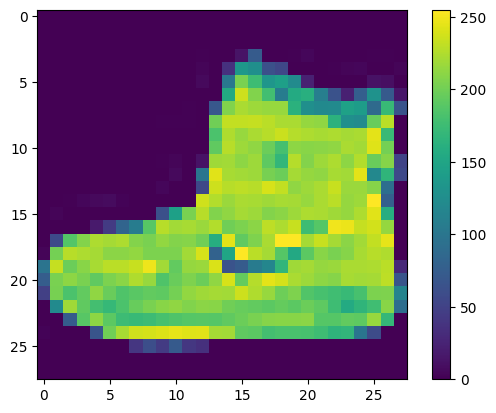

In [20]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
train_images = train_images / 255
test_images = test_images / 255

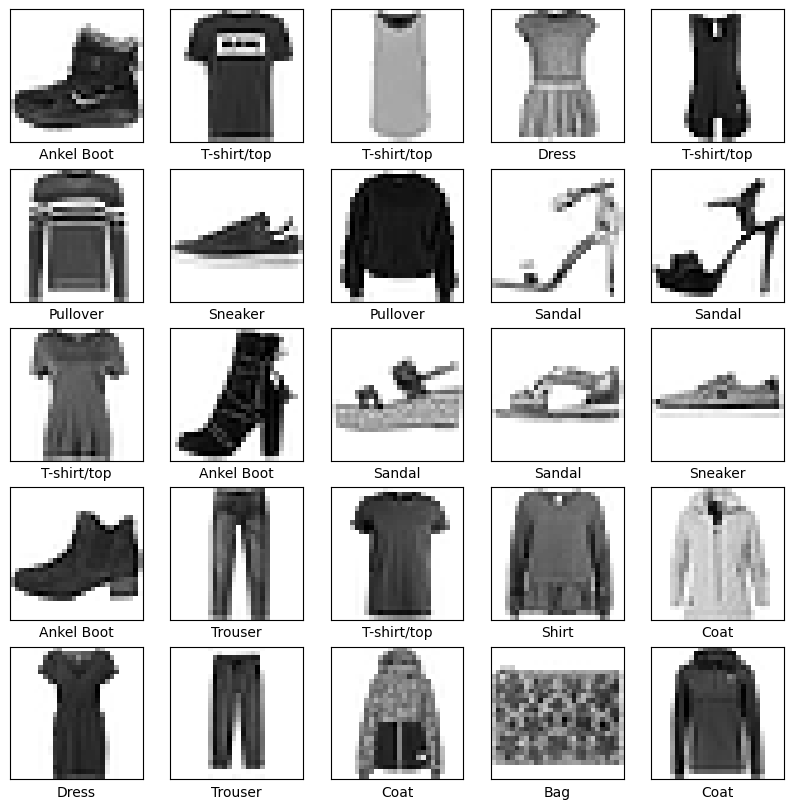

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

# Build Model

**Set up the layer**

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

**Compile Model**

Before the model is ready for training, it needs a few more settings.

* ***Optimizer:*** This is how the model is updated based on the data it sees and its loss function

* ***Loss Function:*** This measure how accurate the model is during training.

* ***Metrics:*** Used to monitor the training and testing steps.

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the Model

Training the neural network requires the following steps

1. Feed the training data to the model.
2. The model learns to associate images and labels
3. You ask the model to make the predictions about a test set
4. Verify that the predictions match the labels from the test_labels array


**Feed the model**

In [26]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2316 - accuracy: 0.9132
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2249 - accuracy: 0.9162
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2180 - accuracy: 0.9191
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2105 - accuracy: 0.9202
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2044 - accuracy: 0.9229
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1993 - accuracy: 0.9241
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1924 - accuracy: 0.9275
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1881 - accuracy: 0.9287
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1827 - accuracy: 0.9309
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.178

**Evaluate the Accuracy**

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy :',test_acc*100,"%")

313/313 - 0s - loss: 0.4181 - accuracy: 0.8853 - 355ms/epoch - 1ms/step

Test Accuracy : 88.52999806404114 %
